In [ ]:
!pip install xlrd pandas
!pip install bnlearn

In [ ]:
import bnlearn as bn
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

Saving smart_grid.csv to smart_grid (4).csv


In [ ]:
df = pd.read_csv(io.StringIO(uploaded['smart_grid.csv'].decode('utf-8')))
print(df.columns)
df.head()

Index(['Season', 'Outage_Duration', 'Number_of_Customers', 'Overload',
       'Weather', 'Time', 'Demand_Factor', 'Day'],
      dtype='object')


,Season,Outage_Duration,Number_of_Customers,Overload,Weather,Time,Demand_Factor,Day
0,Autumn,Less_than_1H,Low,Yes,0,Morning,Low,Weekdays
1,Winter,Less_than_1H,Low,No,0,Evening,Low,Weekdays
2,Spring,More_than_1H,Low,No,0,Evening,Low,Weekdays
3,Winter,Less_than_1H,High,No,1,Morning,Low,Weekdays
4,Spring,More_than_1H,Low,No,0,Morning,Low,Weekend


In [ ]:
df["Weather"].describe()

count    700.000000
mean       0.391429
std        0.488419
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Weather, dtype: float64

In [ ]:
dSeason={"Autumn":0,"Winter":1,"Spring":2,"Summer":3}
df["Season"]=df["Season"].map(dSeason)

dOutage_Duration={"Less_than_1H":0,"More_than_1H":1}
df["Outage_Duration"]=df["Outage_Duration"].map(dOutage_Duration)

dNumber_of_Customers={"Low":0,"High":1}
df["Number_of_Customers"]=df["Number_of_Customers"].map(dNumber_of_Customers)

dOverload={"No":0,"Yes":1}
df["Overload"]=df["Overload"].map(dOverload)

dTime={"Morning":0,"Afternoon":1,"Evening":2,"Night":3}
df["Time"]=df["Time"].map(dTime)

#df["Weather"]=df["Weather"].map({"Cold":0,"Warm":1})
#df.head()

dDemand_Factor={"Low":0,"Medium":1,"High":2}
df["Demand_Factor"]=df["Demand_Factor"].map(dDemand_Factor)

dDay={"Weekend":0,"Weekdays":1}
df["Day"]=df["Day"].map(dDay)

df.head(10)

,Season,Outage_Duration,Number_of_Customers,Overload,Weather,Time,Demand_Factor,Day
0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,2,0,1
2,2,1,0,0,0,2,0,1
3,1,0,1,0,1,0,0,1
4,2,1,0,0,0,0,0,0
5,1,1,0,0,0,0,1,1
6,0,1,0,0,1,2,0,1
7,2,1,0,0,0,2,2,0
8,3,0,0,1,1,2,2,0
9,1,1,1,0,0,3,0,1


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Plot based on BayesianModel


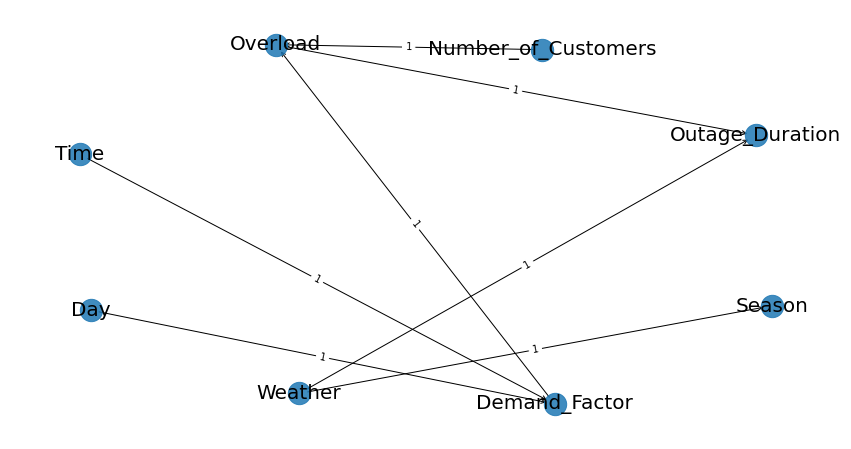

In [ ]:
model = bn.structure_learning.fit(df)

G = bn.plot(model)

[BNLEARN][PARAMETER LEARNING] Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.
CPD of Number_of_Customers:
+------------------------+----------+
| Number_of_Customers(0) | 0.538824 |
+------------------------+----------+
| Number_of_Customers(1) | 0.461176 |
+------------------------+----------+
CPD of Overload:
+---------------------+------------------------+------------------------+------------------------+------------------------+------------------------+------------------------+
| Demand_Factor       | Demand_Factor(0)       | Demand_Factor(0)       | Demand_Factor(1)       | Demand_Factor(1)       | Demand_Factor(2)       | Demand_Factor(2)       |
+---------------------+------------------------+------------------------+------------------------+------------------------+------------------------+------------------------+
| Number_of_Customers | Number_of_Customers(0) | Number_of_Customers(1) | Number_of_Customers(0) | Number_of_Customers(1) | Numb

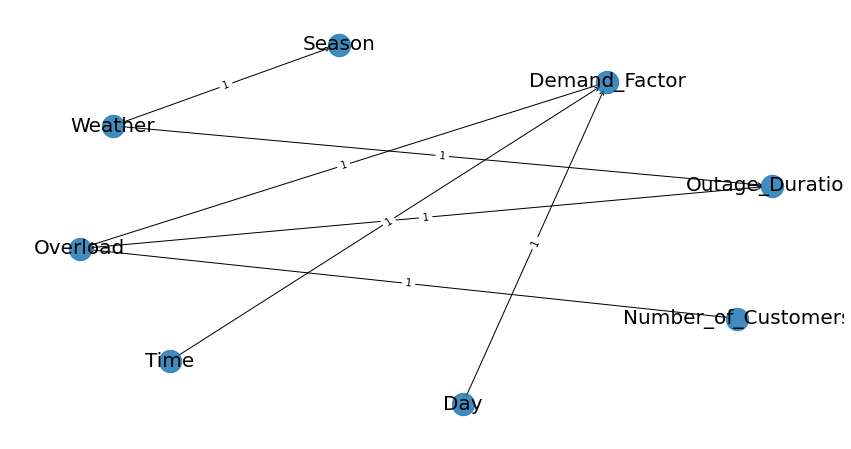

In [ ]:
# learn the parameters of the DAG using the df
model_update = bn.parameter_learning.fit(model, df, methodtype="bayes")
# Make plot
G = bn.plot(model_update)

In [ ]:
# performing inference
q_1 = bn.inference.fit(model_update, variables=['Day'], evidence={'Time':0,'Demand_Factor':1})


Eliminating: Weather: 100%|██████████| 5/5 [00:00<00:00, 531.50it/s]

[bnlearn] >Variable Elimination..
+--------+------------+
| Day    |   phi(Day) |
+========+============+
| Day(0) |     0.5866 |
+--------+------------+
| Day(1) |     0.4134 |
+--------+------------+


In [ ]:
# performing inference
q_2 = bn.inference.fit(model_update, variables=['Demand_Factor'], evidence={'Overload':1,'Weather':0})


Eliminating: Outage_Duration: 100%|██████████| 5/5 [00:00<00:00, 337.80it/s]

[bnlearn] >Variable Elimination..
+------------------+----------------------+
| Demand_Factor    |   phi(Demand_Factor) |
+==================+======================+
| Demand_Factor(0) |               0.3331 |
+------------------+----------------------+
| Demand_Factor(1) |               0.2994 |
+------------------+----------------------+
| Demand_Factor(2) |               0.3675 |
+------------------+----------------------+


In [ ]:
# performing inference
q_3 = bn.inference.fit(model_update, variables=['Number_of_Customers'], evidence={'Demand_Factor':2})


Eliminating: Weather: 100%|██████████| 6/6 [00:00<00:00, 318.71it/s]

[bnlearn] >Variable Elimination..
+------------------------+----------------------------+
| Number_of_Customers    |   phi(Number_of_Customers) |
+========================+============================+
| Number_of_Customers(0) |                     0.5388 |
+------------------------+----------------------------+
| Number_of_Customers(1) |                     0.4612 |
+------------------------+----------------------------+
